# Credit Card Customer Segmentation
In this guided project, we’ll assume the role of a data scientist working for a credit card company. The dataset contains information about the company’s clients, and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:
1. Analyze the dataset;
2. Prepare the data for modeling;
3. Find an appropriate number of clusters;
4. Segment the data;
5. Interpret and explain the results.

Here's the data dictionary:
customer_id: unique identifier for each customer.
age: customer age in years.
gender: customer gender (M or F).
dependent_count: number of dependents of each customer.
education_level: level of education ("High School", "Graduate", etc.).
marital_status: marital status ("Single", "Married", etc.).
estimated_income: the estimated income for the customer projected by the data science team.
months_on_book: time as a customer in months.
total_relationship_count: number of times the customer contacted the company.
months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
credit_limit: customer's credit limit.
total_trans_amount: the overall amount of money spent on the card by the customer.
total_trans_count: the overall number of times the customer used the card.
avg_utilization_ratio: daily average utilization ratio.

**Project Goal** *- Segment the client data into different groups in order where there's a group for each client, as well as an explanation of the characteristics of each group and the main points that make them different.*

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


### Dataset Overview

Having loaded the dataset into a dataframe, we will analyze the data in order to address the following questions:
- How big is the dataset? How many columns does it have? Do we see any particular column that doesn't use the analysis?
- What's the type of data contained in each column? Are there many categorical variables? How are we dealing with them?
- Are there any missing values?
- Look at the correlation between the columns and explain what we see.
- Plot the distribution of each numeric column and comment on the results.

In [3]:
df.shape

(10127, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [5]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [6]:
df.describe(include='all')

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127,10127.000000,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,2,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,Graduate,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5358,NaN,3685,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,46.325960,NaN,2.346203,NaN,NaN,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,NaN,1.298908,NaN,NaN,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,NaN,0.000000,NaN,NaN,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,NaN,1.000000,NaN,NaN,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,NaN,2.000000,NaN,NaN,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,NaN,3.000000,NaN,NaN,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000


The dataframe has 14 columns and over 10,000 records. There are a number of 11 numeric and 3 categorical columns. The categorical columns are gender, education level and marital status. These categorical columns are relevant to any customer segmentation analysis. Since there isn't much range in the possible responses from these columns, we can encode them and use them in the analysis. There are no missing values and from our use of the describe() method, there are no minimum values that seem abnormal.

Let's consider some correlation analysis.

In [7]:
df.corr()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


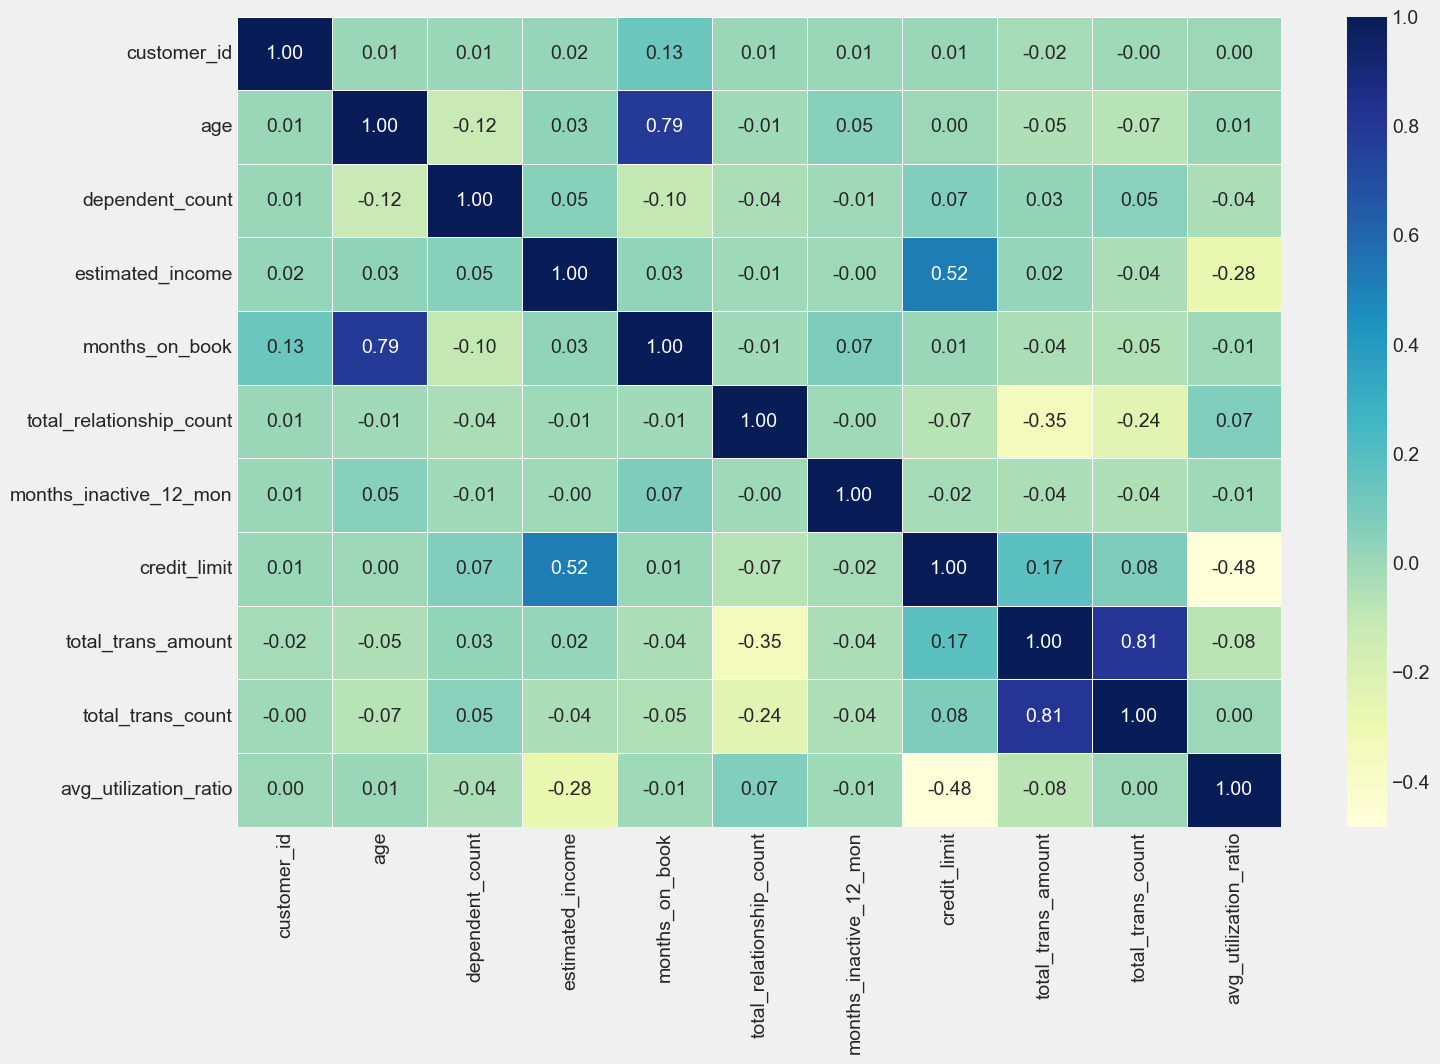

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

We can see some significant positive and negative correlations across features in the dataframe. Age is positively correlated with months on book. Credit limit is positively correlated with estimated income; and total transaction count is positively correlated with total transaction amount.

These correlations make sense. For example, older people are more likely to have their accounts for longer than younger people and are probably less likely to hop around financial products. There's a negative correlation between credit limit adn average utilization ratio, between total transaction amount and total relationship count and between estimated income and average utilization ratio.

Generally, the rest of the data is not correlated.

We'll now plot the distribution of each numerica column in the dataframe.

In [9]:
numeric_columns = list(df.columns)
numeric_columns.remove('gender')
numeric_columns.remove('marital_status')
numeric_columns.remove('education_level')
numeric_columns

['customer_id',
 'age',
 'dependent_count',
 'estimated_income',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'credit_limit',
 'total_trans_amount',
 'total_trans_count',
 'avg_utilization_ratio']

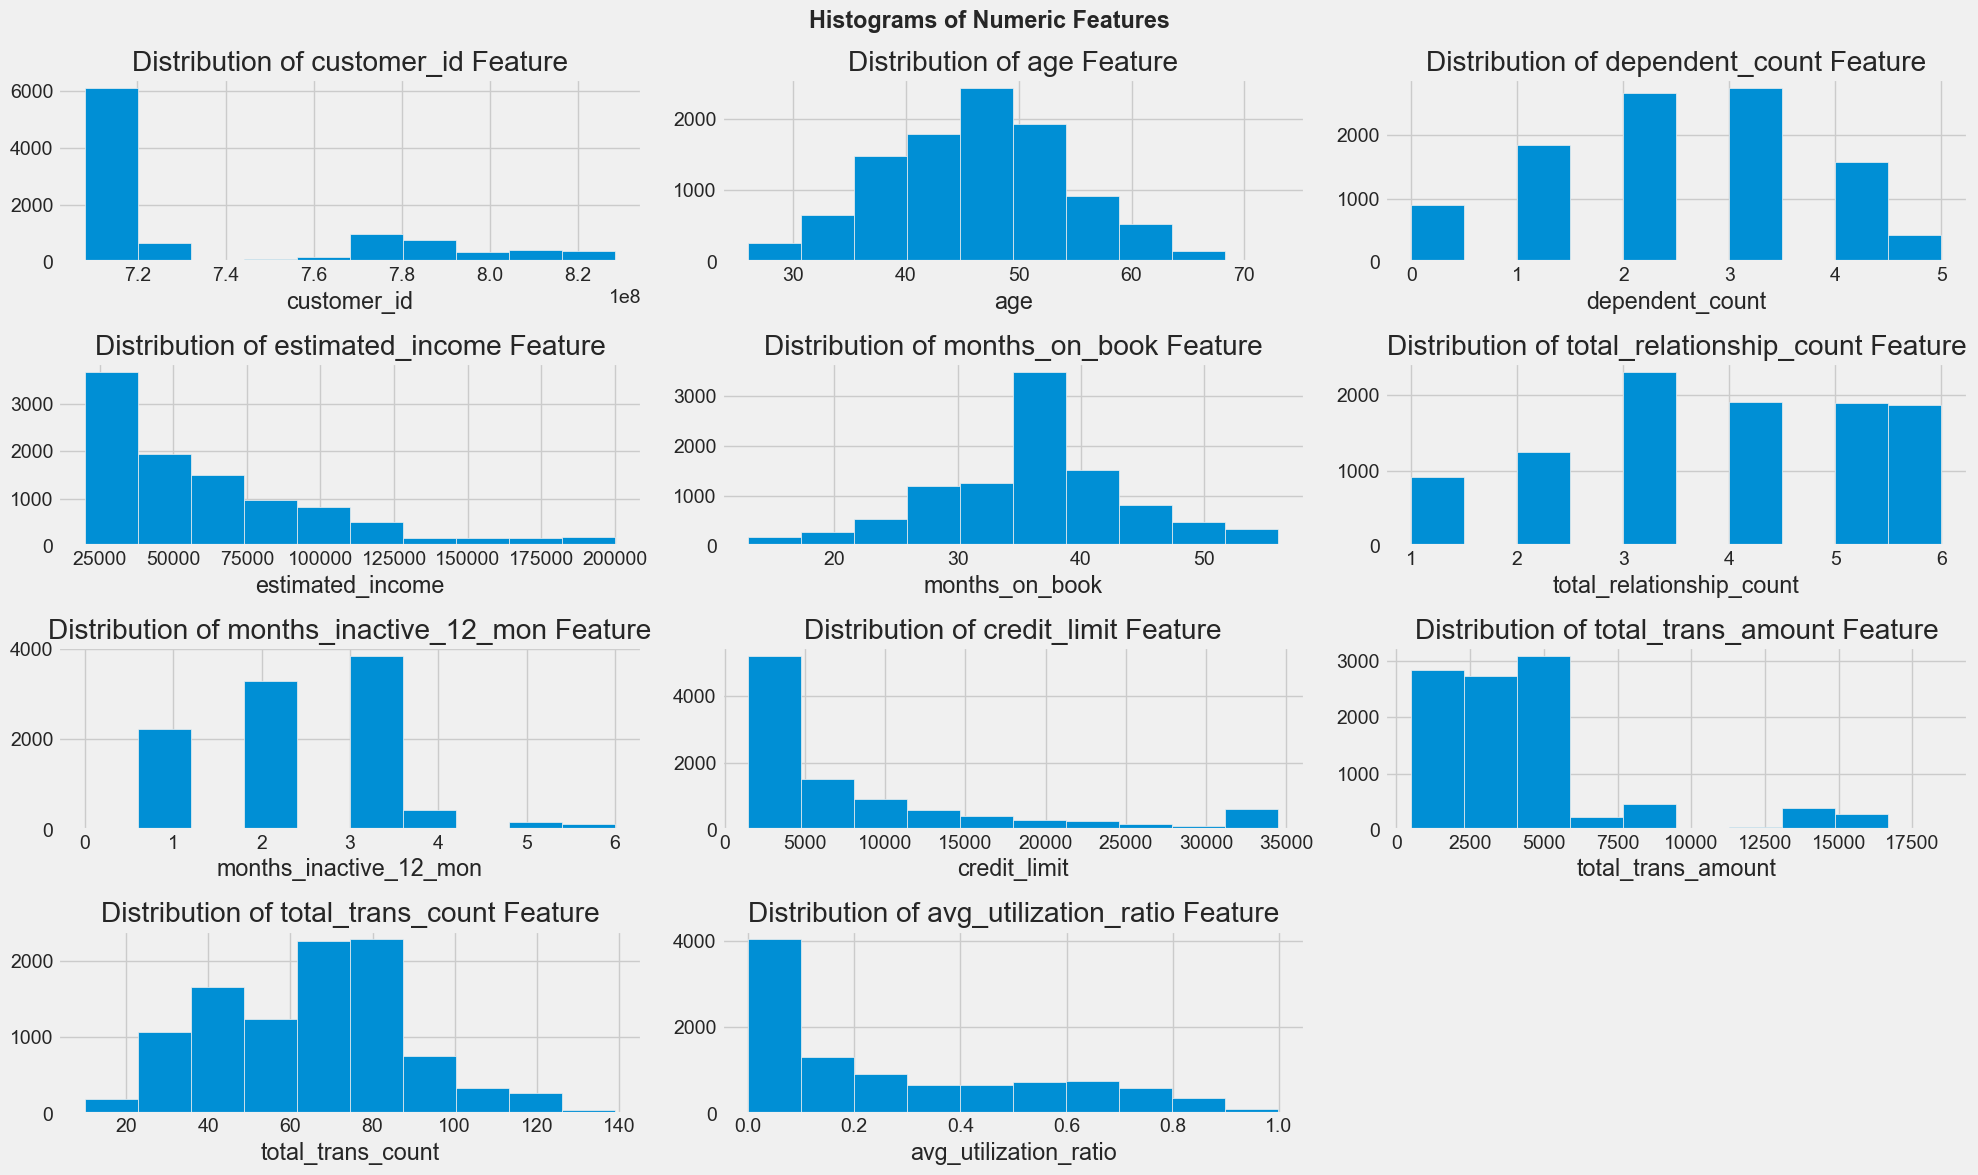

In [10]:
style.use('fivethirtyeight')
plt.figure(figsize=(20,12))
plot_num = list(range(0,11))

for num in plot_num:
    plt.subplot(4, 3, num+1)
    plt.hist(df[numeric_columns[num]])
    plt.xlabel(numeric_columns[num])
    plt.title(f'Distribution of {numeric_columns[num]} Feature')

plt.suptitle(t='Histograms of Numeric Features', weight='bold')
plt.tight_layout()
plt.show()

From our first distribution chart, we can identify a number of numeric columns that are encoded categorical columns as they are no bin ranges in their x-axis values, and we'll drop them from our chart. They include;
1. customer_id
2. dependent_count
3. total_relationship_count
4. months_inactive_12_mon

Let's drop them and rechart

In [11]:
numeric_columns.remove('customer_id')
numeric_columns.remove('dependent_count')
numeric_columns.remove('total_relationship_count')
numeric_columns.remove('months_inactive_12_mon')
numeric_columns

['age',
 'estimated_income',
 'months_on_book',
 'credit_limit',
 'total_trans_amount',
 'total_trans_count',
 'avg_utilization_ratio']

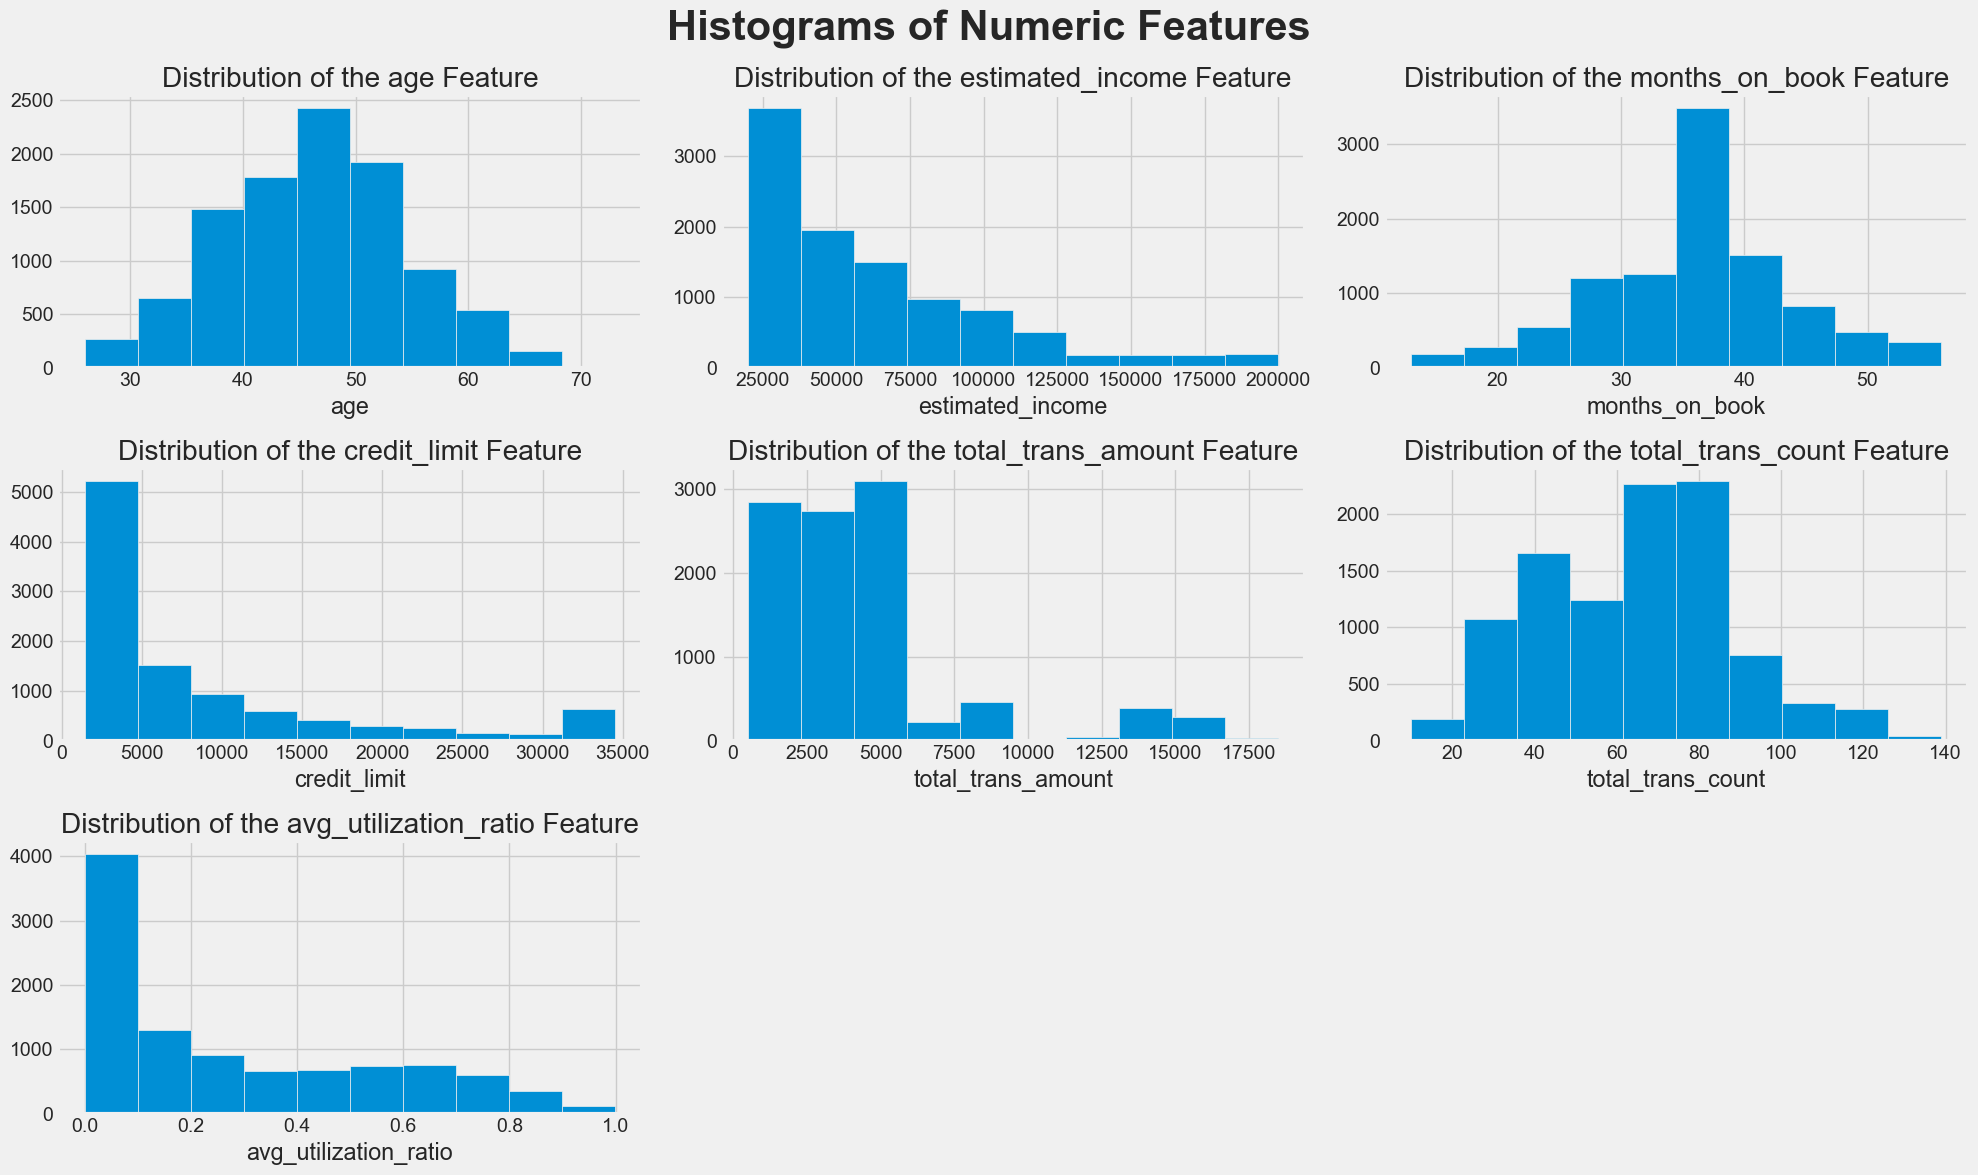

In [12]:
style.use('fivethirtyeight')
plt.figure(figsize=(20,12))
plot_num = list(range(0,7))

for num in plot_num:
    plt.subplot(3, 3, num+1)
    plt.hist(df[numeric_columns[num]])
    # df[numeric_columns[num]].plot(kind='kde', color='green')
    plt.xlabel(numeric_columns[num])
    plt.title(f'Distribution of the {numeric_columns[num]} Feature')

plt.suptitle(t='Histograms of Numeric Features', weight='bold', size=30)
plt.tight_layout()
plt.show()

The Age Feature is normally distributed. This means the mean, median and mode are around the same value. From the describe analysis we conducted above, this number is 46.

The estimated income feature is right skewed. This means that the mean is to right (higher) of the median value on the x_axis. This is confirmed in the describe method analysis. The median is 50,000 and the mean is 62,078.

The months on book feature is also normally distributed. The mean and median and mode are around the number 36.

The credit limit feature is also right skewed. When we check the describe method result, we see that the mean (8631) is to the right of the median (4549).

The total transaction amount feature is right skewed but the initial portion of the distribution is uniform. The mean and median are between the 3900-4400 range. We'll analyze this to determine the scope of the outliers in this distribution.

The total transaction count feature is somewhat normally distributed and right skewed. The median and mode is within the 65-67 range.

The average utilization ratio is right skewed. We can also see this in the statistical analysis where the mean (0.27) is to the right of the median (0.17) on the x-axis.

In [13]:
df.describe(include='all')

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127,10127.000000,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,2,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,Graduate,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5358,NaN,3685,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,46.325960,NaN,2.346203,NaN,NaN,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,NaN,1.298908,NaN,NaN,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,NaN,0.000000,NaN,NaN,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,NaN,1.000000,NaN,NaN,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,NaN,2.000000,NaN,NaN,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,NaN,3.000000,NaN,NaN,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000


### Feature Engineering
In this section, we will encode the gender, education_level and marital_status columns. Before we do the modifications, it's important to create a copy of the original DataFrame. We'll make all the modifications in the copy and leave the original DataFrame untouched, so we can use it to analyze the results later.

In [14]:
customers_modif = df.copy()
customers_modif[['gender', 'education_level']].head()

,gender,education_level
0,M,High School
1,F,Graduate
2,M,Graduate
3,F,High School
4,M,Uneducated


In [15]:
customers_modif['gender'] = customers_modif['gender'].apply(lambda x:1 if x == 'M' else 0)
customers_modif['gender'].head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [16]:
def encode_education_level(row):
    if row == 'Uneducated':
        return 0
    elif row == 'High School':
        return 1
    elif row == 'College':
        return 2
    elif row == 'Graduate':
        return 3
    elif row == 'Post-Graduate':
        return 4
    else:
        return 5

customers_modif['education_level'] = customers_modif['education_level'].apply(encode_education_level)

customers_modif['education_level'].head()

0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

We can't simply encode the marital_status column, as the data is nor ordinal. Therefore, we'll use one-hot-encoding to create dummy variables from this column.

In [17]:
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [18]:
customers_modif = pd.get_dummies(data=customers_modif,
                                 columns=['marital_status'],
                                 drop_first=True)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [19]:
customers_modif.corr()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
customer_id,1.000000,0.007613,0.020188,0.006772,-0.000313,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266,-0.003128,-0.009557,0.010771
age,0.007613,1.000000,-0.017312,-0.122254,0.005895,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114,0.047364,-0.011248,-0.026694
gender,0.020188,-0.017312,1.000000,0.004563,-0.012931,0.601792,-0.006728,0.003157,-0.011163,0.420806,0.024890,-0.067454,-0.257851,0.011427,-0.015756,0.012307
dependent_count,0.006772,-0.122254,0.004563,1.000000,-0.003957,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135,0.014385,-0.040707,0.041743
education_level,-0.000313,0.005895,-0.012931,-0.003957,1.000000,-0.024990,0.009446,-0.002744,0.001912,-0.011718,-0.011857,-0.010577,0.002189,0.009639,-0.007477,-0.001157
estimated_income,0.015787,0.032922,0.601792,0.051620,-0.024990,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532,0.020485,-0.018926,0.000253
months_on_book,0.134588,0.788912,-0.006728,-0.103062,0.009446,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541,0.033194,-0.005065,-0.026145
total_relationship_count,0.006907,-0.010931,0.003157,-0.039076,-0.002744,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663,0.017001,-0.017329,-0.009376
months_inactive_12_mon,0.005729,0.054361,-0.011163,-0.010768,0.001912,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503,-0.007065,0.008973,-0.005053
credit_limit,0.005708,0.002476,0.420806,0.068065,-0.011718,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965,-0.056713,0.032309,0.025291


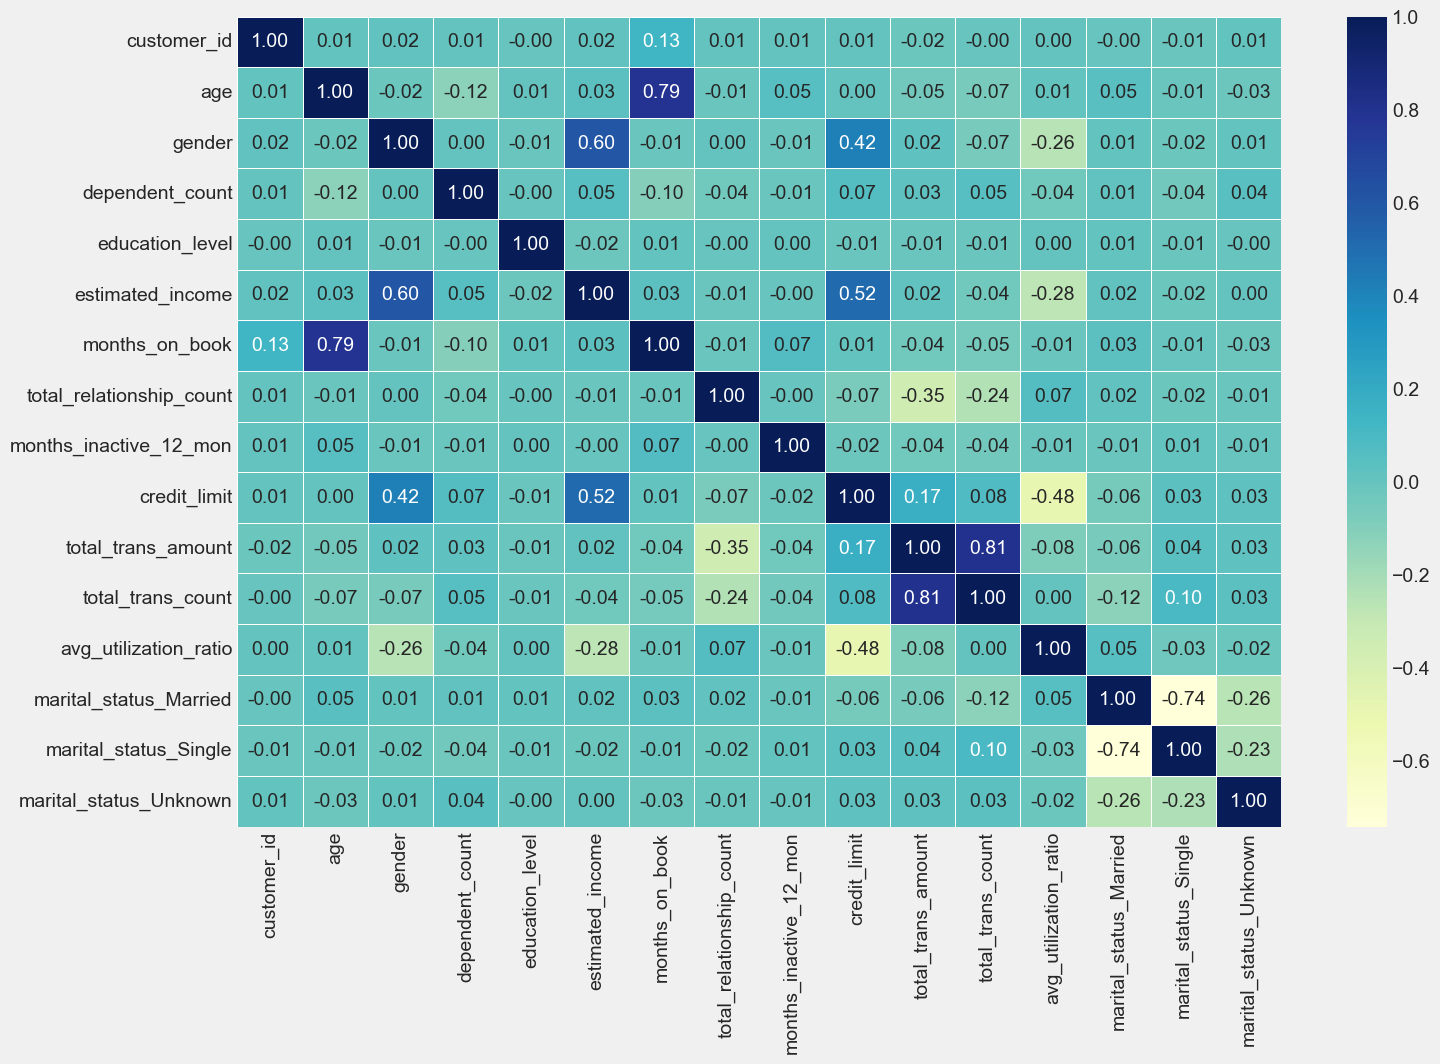

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(customers_modif.corr(),
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

### Scaling the Data
We have different scaled data across the dataframe. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

In [21]:
df_new = customers_modif.drop(columns='customer_id')

scaler = StandardScaler()
scaler.fit(df_new)
scaled_df = scaler.transform(df_new)
scaled_df = pd.DataFrame(scaled_df)

scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


### Choosing K
Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

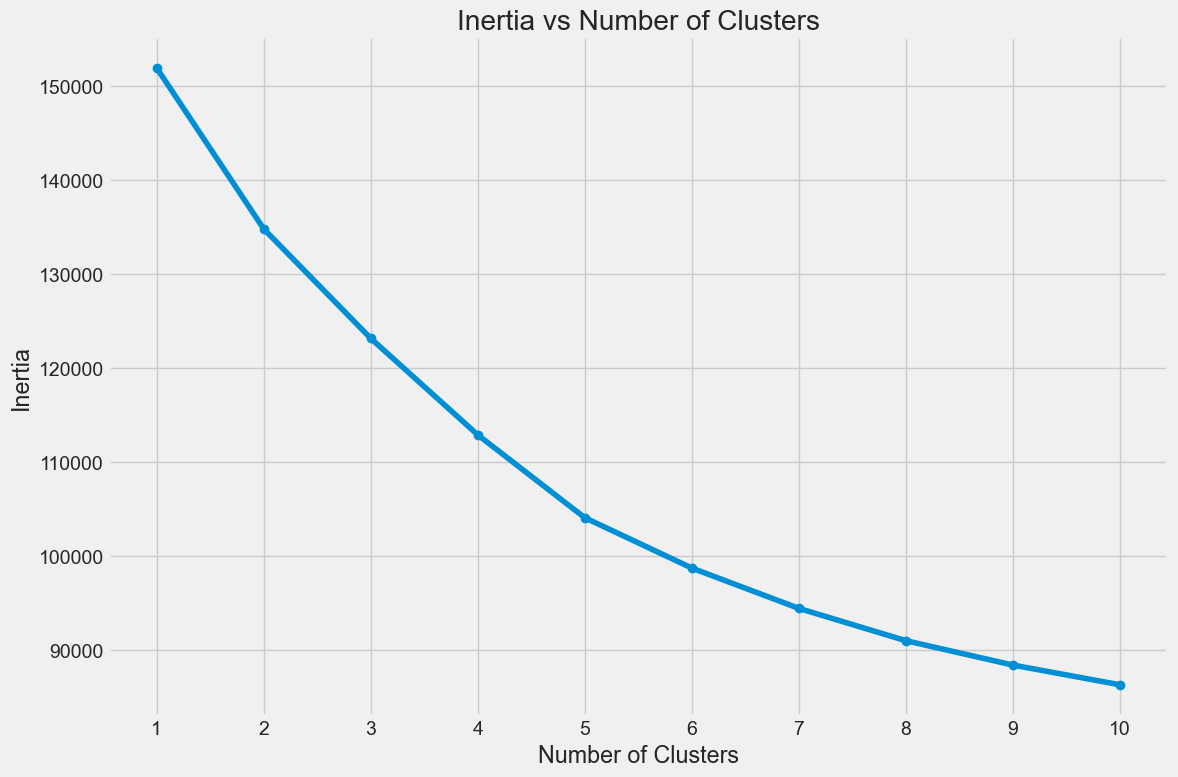

In [22]:
inertia_list = list()
num_clusters = 10

for k in range(1, num_clusters+1):
    model = KMeans(n_clusters=k)
    model.fit_predict(scaled_df)
    inertia_list.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, num_clusters+1), inertia_list, marker='o')
plt.xticks(ticks=range(1, num_clusters+1),
           labels=range(1, num_clusters+1))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()


From the elbow curve, we have hte option of choosing between 5-7 as the number of clusters. Since 6 is the median and mean of that range, we'll select 6 as the elbow. We'll now use this for the parameer n_clusters.

We'll now instantiate a KMeans object and segment the data.

In [36]:
model = KMeans(n_clusters=6)
clusters = model.fit_predict(scaled_df)
clusters

array([3, 4, 3, ..., 5, 1, 5], dtype=int32)

### Analyzing Results
We need to see how the variables used in the clusters differ from cluster to cluster in order better explain what each cluster represents. We should note the most important characteristics of each cluster and how they can impact the business and marketing strategies for each type of customer.

We'll start by putting each record in the original dataframe in a cluster based on the KMeans model.

In [37]:
df['Cluster'] = clusters + 1

In [38]:
df['Cluster'].value_counts()

6    2780
5    2491
4    1771
1    1448
3     907
2     730
Name: Cluster, dtype: int64

Then we'll group each numerical variable by the cluster column and plot a bar chart of the grouping.

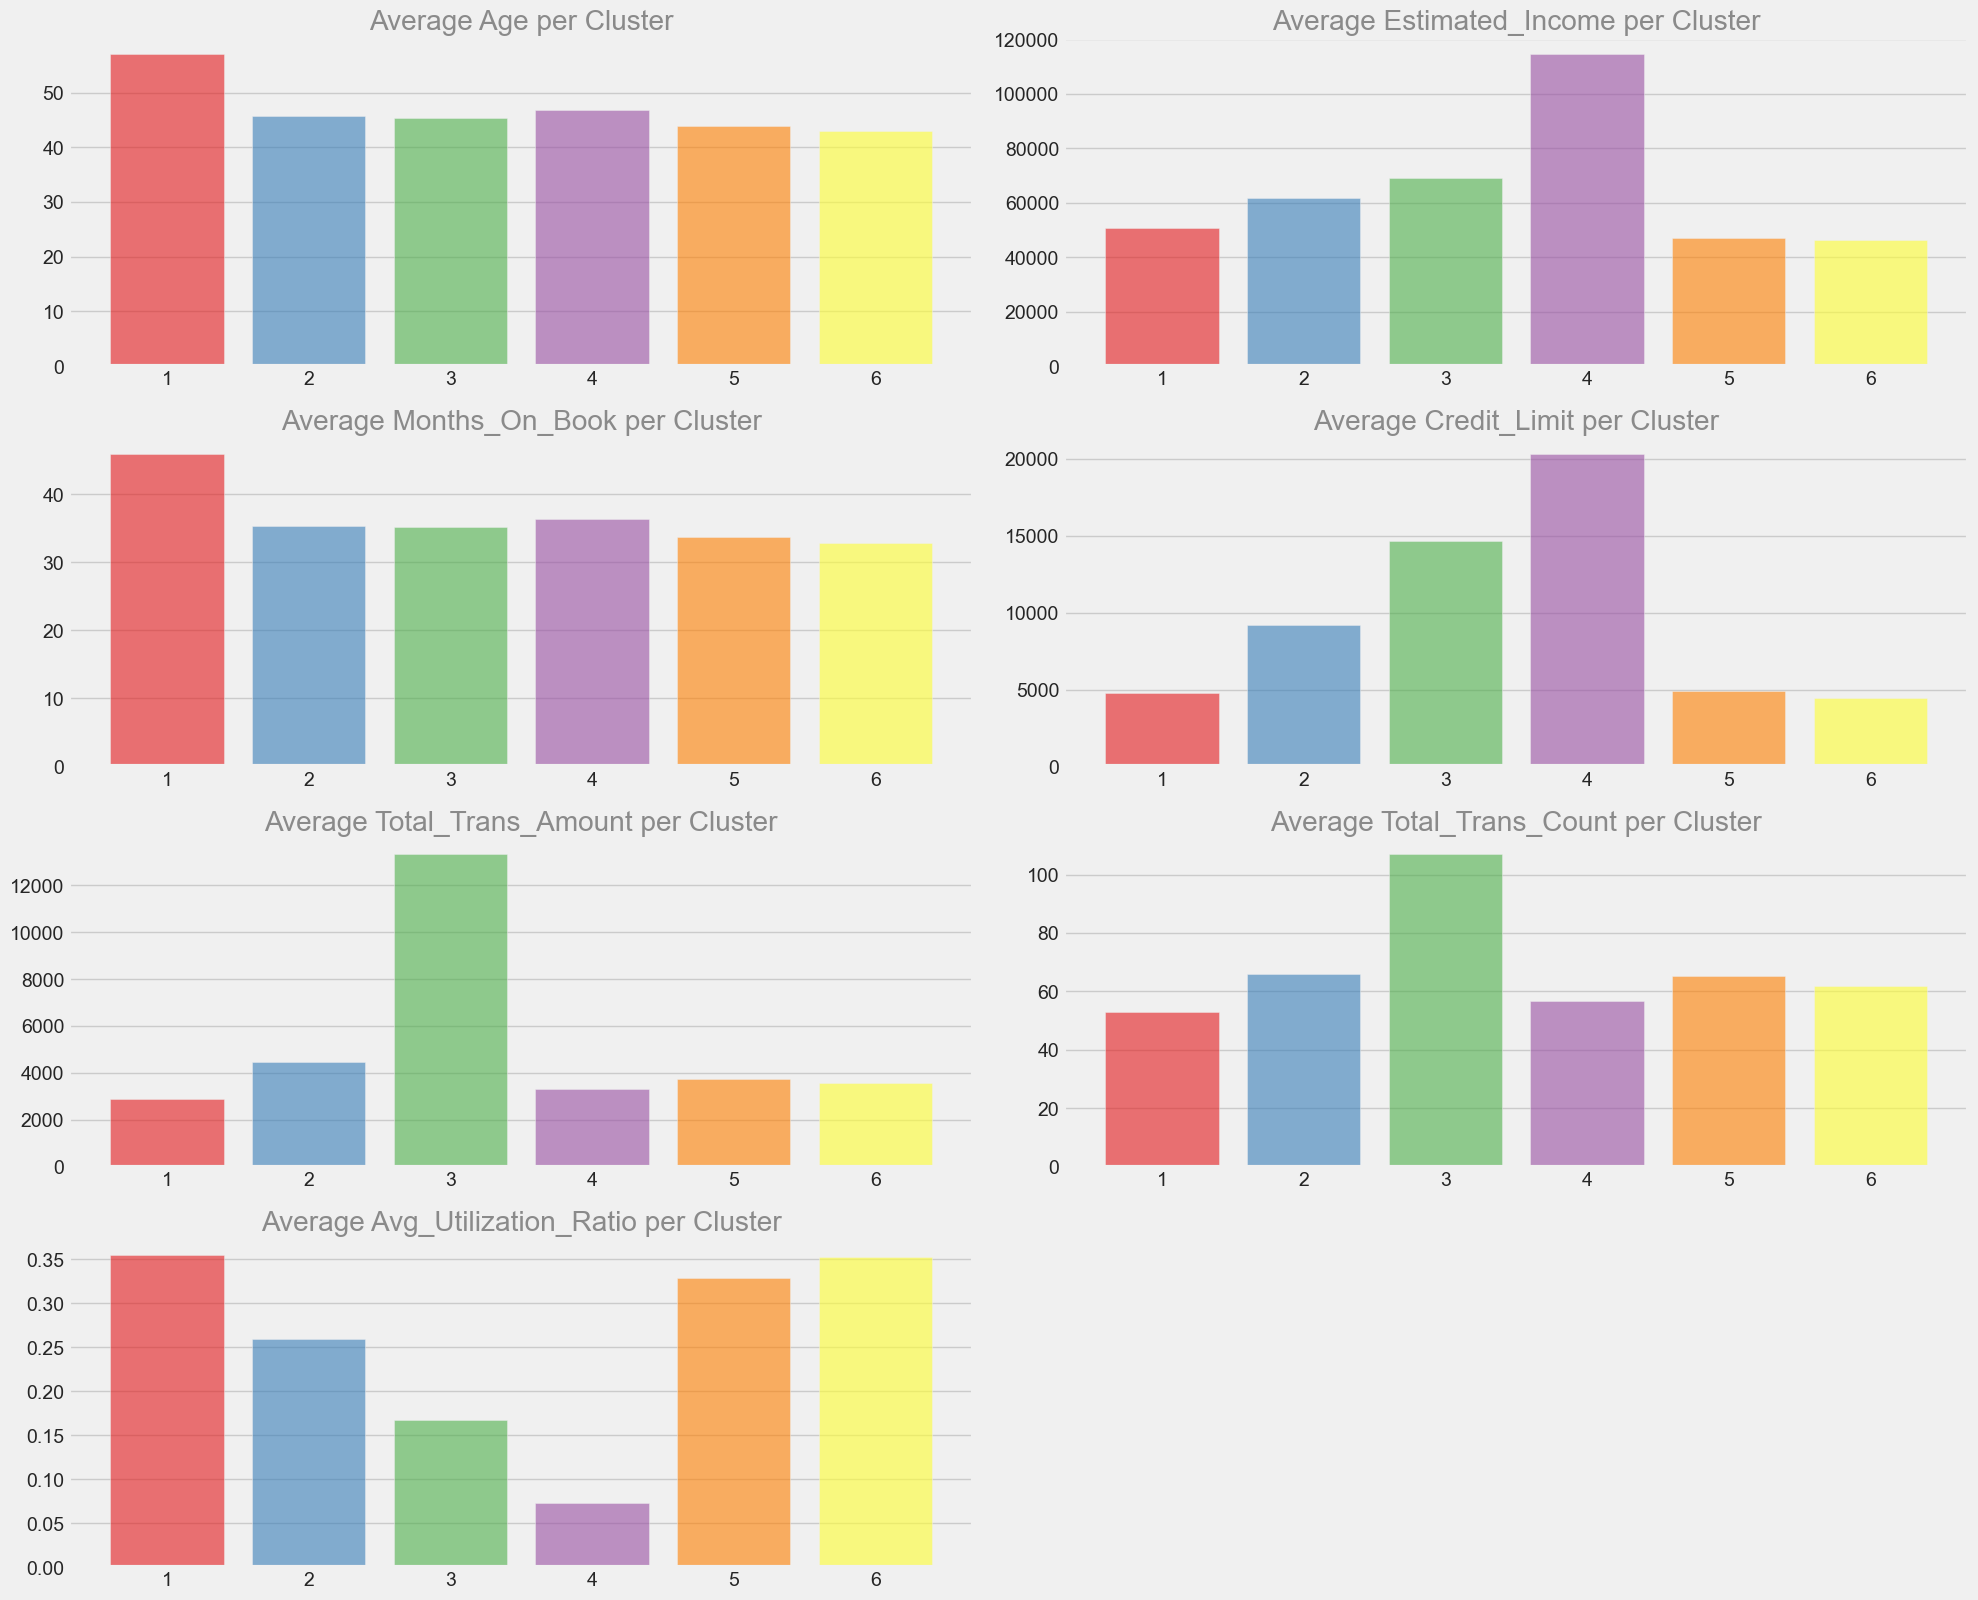

In [41]:
fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

These bar charts give us a comprehensive view of the customers in the dataset. For example, a customer in Cluster 1 is on average:
1. a senior citizen
2. lower middle class
3. has had their accounts for much longer than most clusters
4. has a very low credit limit
5. conducts a lot of small value transactions on the card
6. has a very high average utilization ratio.
This can inform the type of products marketed to this customer.

Generally from the age bar chart, we can see that most customers are on average either middle age or senior citizens. This does not bode well for the continuity of this business. The business may choose to market products to early career and younger professionals. However, those customers are less likely to have the month on books rates that the existing older customer base has.

We can also tell from the bar charts that estimated income and credit limit are related, as the general length of bars in one mirrors the other.

Customers in cluster 3 conduct a lot high value transaction on their cards yet have low average utilization ratios and high credit limits. They're also middle class. This is the optimum customer segment for the business. We'd like to consider the average marital status and education level of this group.

In [28]:
df.groupby(['Cluster', 'education_level'])['education_level'].agg('count')

Cluster  education_level
1        College             213
         Doctorate            91
         Graduate            612
         High School         433
         Post-Graduate       102
         Uneducated          313
2        College             166
         Doctorate            94
         Graduate            532
         High School         323
         Post-Graduate        78
         Uneducated          249
3        College             285
         Doctorate           137
         Graduate            914
         High School         575
         Post-Graduate       149
         Uneducated          433
4        College             102
         Doctorate            42
         Graduate            327
         High School         219
         Post-Graduate        50
         Uneducated          171
5        College              82
         Doctorate            30
         Graduate            259
         High School         176
         Post-Graduate        58
         Uneducate

In [29]:
df.groupby(['Cluster', 'marital_status'])['marital_status'].agg('count')

Cluster  marital_status
1        Divorced           195
         Married            867
         Single             702
2        Divorced           107
         Married            967
         Single             368
3        Single            2493
4        Divorced            81
         Married            433
         Single             380
         Unknown             17
5        Unknown            732
6        Divorced           365
         Married           2420
Name: marital_status, dtype: int64

It turns out that the customers in cluster 2 are mostly spread across all education and marital status classes, although they have a lower number of post-graduate and doctorate persons and less divorced and marital status unknown persons. This may imply that these categorical features do not really affect these users. We're better off segmenting and predicting these users based on age, income and credit limit. This is in line with the customer_modif correlation chart we made above.

We'll chart scatter plots for cluster pairs of variables with high correlations. We've identified these features as:
1. Age v. Months on Book
2. Estimated Income v. Credit Limit
3. Credit Limit v. Average Utilization Ratio
4. Total Transaction Amount v. Total Transaction Count

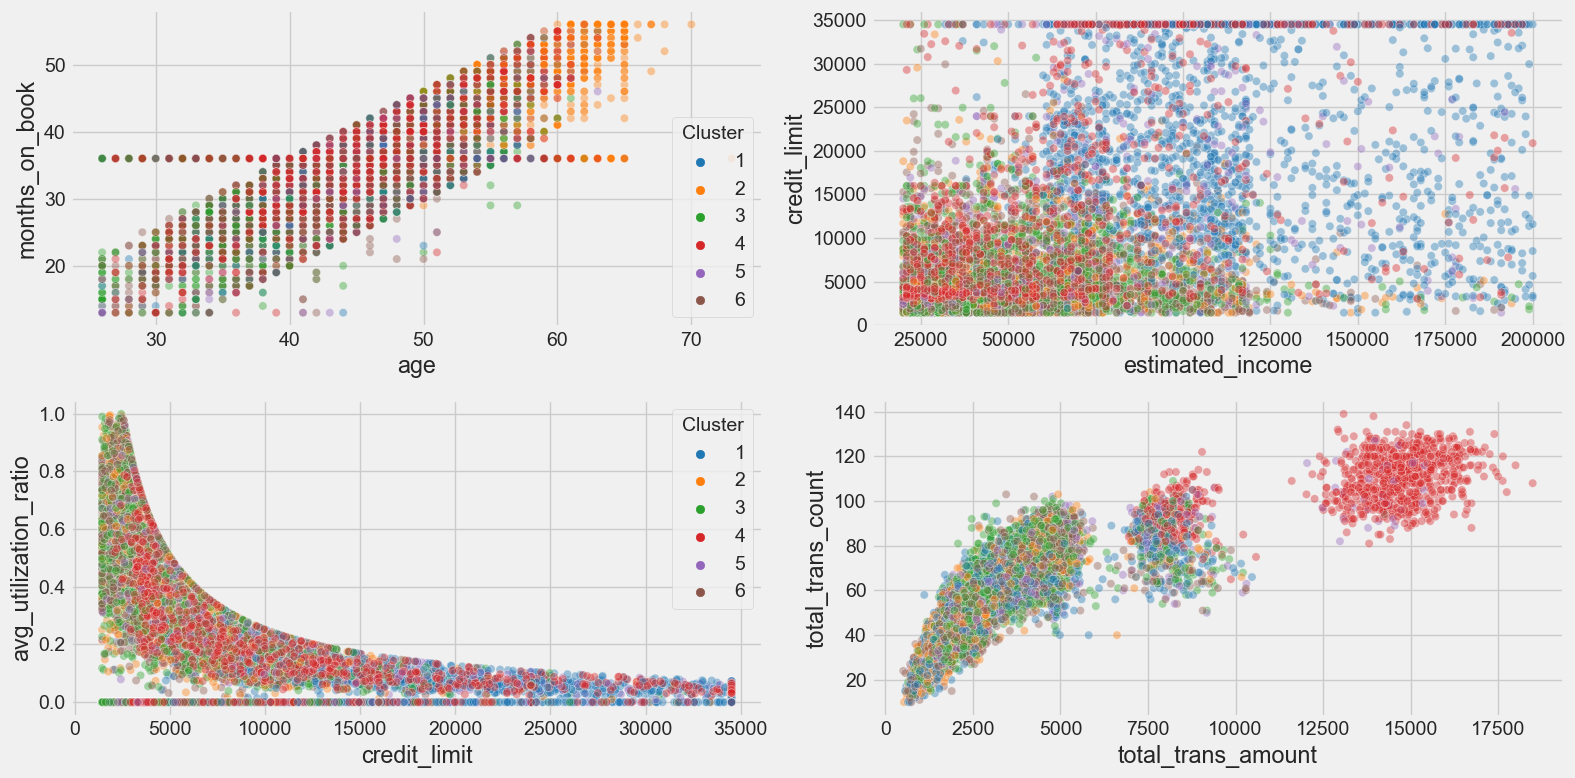

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='Cluster',
                data=df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='Cluster',
                data=df, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='Cluster',
                data=df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_amount', y='total_trans_count', hue='Cluster',
                data=df, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

We'll use the pandas.crosstab() function to calculate the percentual distribution of each variable per cluster for the categorical columns, and then use the data to plot a stacked bar chart.

In [31]:
categorical_variables = ['gender', 'education_level', 'marital_status']
categorical_variables

['gender', 'education_level', 'marital_status']

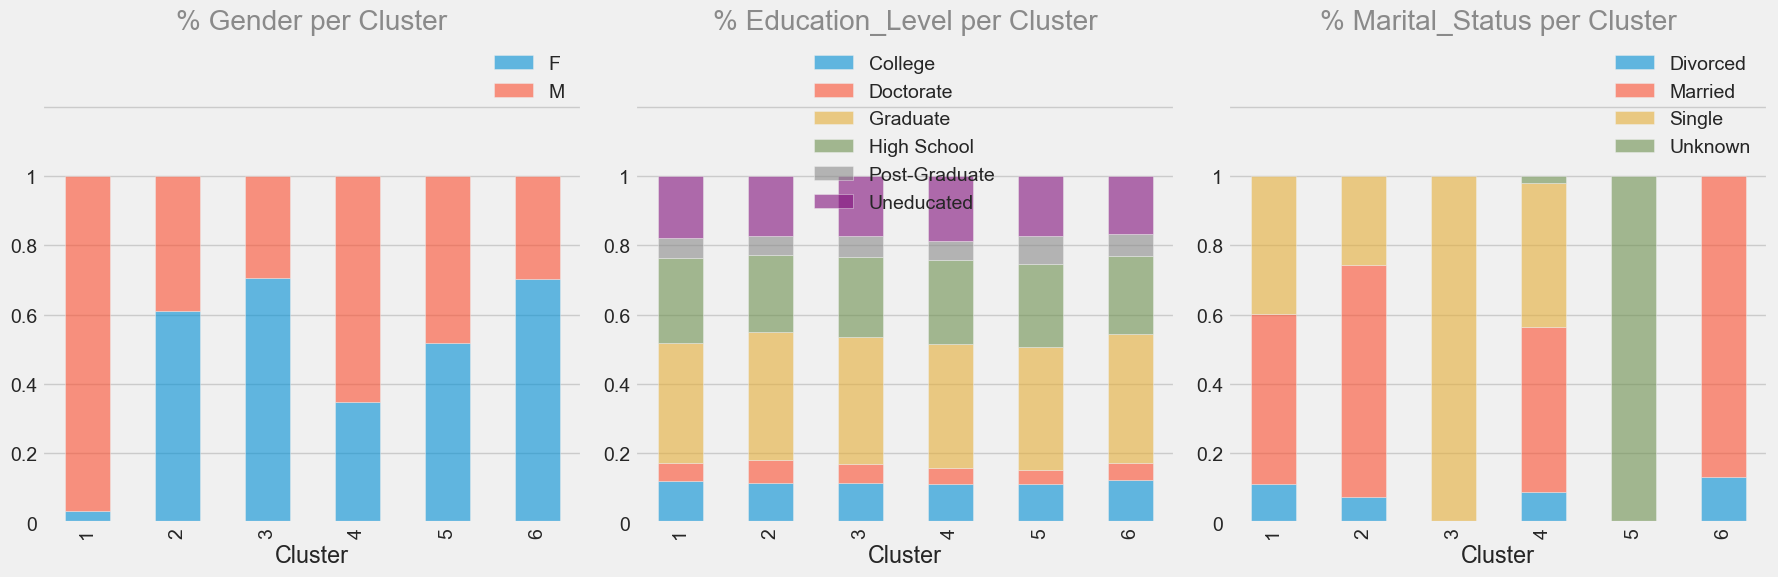

In [32]:
fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_variables):
    plot_df = pd.crosstab(index=df['Cluster'], columns=df[col],
                          values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()


Women are generally the majority in most clusters except 1 and 6, where men are overrepresented in the clusters. Graduates have the highest share of representation across all education level clusters, and high school grads are the second highest. Married people are significantly represented in the first 4 clusters except clusters 5 and 6, which are solely populated by unknowns and singles respectively. While these cluster separations in 5 and 6 may be problematic, we've found above that the marital status is not correlated with any variables in the dataset.

### Next Steps
Here are some potential next steps:
1. Perform the clusterization using different numbers of clusters. Are there any differences?
2. Research other ways to find the best number of clusters and compare the results with the results from the elbow method.
3. Use fewer variables in the clusterization and explain what changes this brings to the model.